In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\nibin\\OneDrive\\Desktop\\imdb_top_1000.csv")

In [4]:
dt = df.copy()

In [5]:
dt.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [6]:
dt.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [7]:
dt.shape

(1000, 16)

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


# Dropping the irrelevant column 'Poster Link'

In [9]:
dt = dt.drop(['Poster_Link'], axis=1)

In [11]:
dt.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


# Dropping the singular value columns after combining into a single column

In [13]:
dt = dt.drop(['Star2','Star3','Star4'],axis=1)
dt.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Morgan Freeman,Bob Gunton,William Sadler",2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Al Pacino,James Caan,Diane Keaton",1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,"Heath Ledger,Aaron Eckhart,Michael Caine",2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,"Robert De Niro,Robert Duvall,Diane Keaton",1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,"Lee J. Cobb,Martin Balsam,John Fiedler",689845,4360000.0


# Renaming the column

In [14]:
dt.col = dt.rename(columns={"Series_Title":"Title", "Overview":"Plot", 
                   "Released_Year":"Year", "Meta_score":"Metascore",
                   "IMDB_Rating":"Rating", "Star1":"Cast",
                   "No_of_Votes":"Votes", "Gross":"Revenue"})

In [15]:
dt.col.head()

,Title,Year,Certificate,Runtime,Genre,Rating,Plot,Metascore,Director,Cast,Votes,Revenue
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Morgan Freeman,Bob Gunton,William Sadler",2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Al Pacino,James Caan,Diane Keaton",1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,"Heath Ledger,Aaron Eckhart,Michael Caine",2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,"Robert De Niro,Robert Duvall,Diane Keaton",1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,"Lee J. Cobb,Martin Balsam,John Fiedler",689845,4360000.0


# Checking the duplicate values

In [16]:
duplicate = dt.col[dt.col.duplicated()]
print("Duplicated Rows:")
print(duplicate)

Duplicated Rows:
Empty DataFrame
Columns: [Title, Year, Certificate, Runtime, Genre, Rating, Plot, Metascore, Director, Cast, Votes, Revenue]
Index: []


In [17]:
duplicated = dt.col[dt.col.duplicated(subset=['Title'])]
duplicated

,Title,Year,Certificate,Runtime,Genre,Rating,Plot,Metascore,Director,Cast,Votes,Revenue
136,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,"Shriya Saran,Tabu,Rajat Kapoor",70367,739478.0


In [18]:
dt_new = dt.col.drop_duplicates()

In [19]:
dt_new

,Title,Year,Certificate,Runtime,Genre,Rating,Plot,Metascore,Director,Cast,Votes,Revenue
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Morgan Freeman,Bob Gunton,William Sadler",2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Al Pacino,James Caan,Diane Keaton",1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,"Heath Ledger,Aaron Eckhart,Michael Caine",2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,"Robert De Niro,Robert Duvall,Diane Keaton",1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,"Lee J. Cobb,Martin Balsam,John Fiedler",689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,"George Peppard,Patricia Neal,Buddy Ebsen",166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,"Rock Hudson,James Dean,Carroll Baker",34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,"Montgomery Clift,Deborah Kerr,Donna Reed",43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,"John Hodiak,Walter Slezak,William Bendix",26471,NaN


# Checking the null values

In [20]:
dt_new.isnull().sum()

Title            0
Year             0
Certificate    101
Runtime          0
Genre            0
Rating           0
Plot             0
Metascore      157
Director         0
Cast             0
Votes            0
Revenue        169
dtype: int64

In [21]:
a = 'Revenue'
rows = dt_new[dt_new[a].isnull()].index.tolist()

print(rows)

[18, 20, 30, 32, 46, 54, 55, 76, 77, 80, 82, 85, 87, 91, 92, 105, 130, 135, 140, 160, 163, 166, 175, 176, 177, 180, 181, 182, 184, 185, 188, 192, 197, 198, 205, 211, 224, 228, 229, 238, 246, 258, 273, 276, 280, 281, 286, 289, 292, 294, 295, 296, 298, 299, 301, 303, 306, 308, 318, 321, 322, 323, 324, 326, 351, 353, 366, 379, 381, 409, 412, 425, 428, 433, 440, 441, 443, 444, 445, 446, 448, 449, 450, 451, 452, 455, 459, 460, 464, 495, 500, 504, 518, 522, 538, 540, 541, 548, 550, 553, 554, 557, 562, 567, 568, 569, 570, 571, 574, 577, 587, 601, 608, 612, 613, 641, 666, 672, 674, 690, 692, 696, 702, 706, 709, 710, 711, 712, 713, 714, 715, 717, 718, 719, 720, 761, 762, 798, 814, 822, 829, 843, 846, 847, 854, 859, 860, 863, 867, 868, 869, 870, 872, 874, 876, 877, 882, 885, 899, 909, 913, 944, 958, 986, 993, 995, 996, 998, 999]


In [22]:
a = 'Revenue'
rows = dt_new[dt_new[a].isnull()][['Title',a]]

print(rows)

                      Title  Revenue
18                 Hamilton      NaN
20          Soorarai Pottru      NaN
30                  Seppuku      NaN
32    It's a Wonderful Life      NaN
46           Hotaru no haka      NaN
..                      ...      ...
993                  Blowup      NaN
995  Breakfast at Tiffany's      NaN
996                   Giant      NaN
998                Lifeboat      NaN
999            The 39 Steps      NaN

[169 rows x 2 columns]


# Filling the null values through statistical method

In [23]:
dt_new['Certificate'].mode()[0]

'U'

In [24]:
dt_new['Metascore'].mean().round()

78.0

In [25]:
dt_new['Revenue'].mean().round()

68034751.0

In [26]:
movies = dt_new.fillna({
                        'Certificate': dt_new['Certificate'].mode()[0],
                        'Metascore': dt_new['Metascore'].mean().round(),
                        'Revenue': dt_new['Revenue'].mean().round()
                        })

In [27]:
movies.isnull().sum()

Title          0
Year           0
Certificate    0
Runtime        0
Genre          0
Rating         0
Plot           0
Metascore      0
Director       0
Cast           0
Votes          0
Revenue        0
dtype: int64

In [28]:
movies.head()

,Title,Year,Certificate,Runtime,Genre,Rating,Plot,Metascore,Director,Cast,Votes,Revenue
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Morgan Freeman,Bob Gunton,William Sadler",2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Al Pacino,James Caan,Diane Keaton",1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,"Heath Ledger,Aaron Eckhart,Michael Caine",2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,"Robert De Niro,Robert Duvall,Diane Keaton",1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,"Lee J. Cobb,Martin Balsam,John Fiedler",689845,4360000.0


In [29]:
df.to_csv('movie.csv',index=False)

# Statistical analysis of the data

In [30]:
movies.describe()

,Rating,Metascore,Votes,Revenue
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,7.949300,77.976000,2.736929e+05,6.803475e+07
std,0.275491,11.362065,3.273727e+05,1.000371e+08
min,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,7.700000,72.000000,5.552625e+04,5.012919e+06
50%,7.900000,78.000000,1.385485e+05,4.238945e+07
75%,8.100000,85.250000,3.741612e+05,6.803475e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


In [31]:
movies['Rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6])

In [32]:
movies['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

In [33]:
movies['Metascore'].unique()

array([ 80., 100.,  84.,  90.,  96.,  94.,  74.,  66.,  92.,  82.,  87.,
        73.,  83.,  78.,  79.,  91.,  61.,  59.,  65.,  85.,  98.,  89.,
        88.,  57.,  67.,  62.,  77.,  64.,  75.,  97.,  99.,  68.,  81.,
        95.,  76.,  69.,  55.,  70.,  58.,  86.,  71.,  63.,  93.,  72.,
        60.,  47.,  49.,  50.,  33.,  54.,  56.,  51.,  53.,  48.,  44.,
        45.,  40.,  52.,  28.,  36.,  46.,  30.,  41.])

In [34]:
movies['Runtime'].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

In [35]:
movies['Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [36]:
movies['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [37]:
movies.shape

(1000, 12)

In [38]:
movies['Title'].isnull().sum()

0

# EDA and data Visualisation

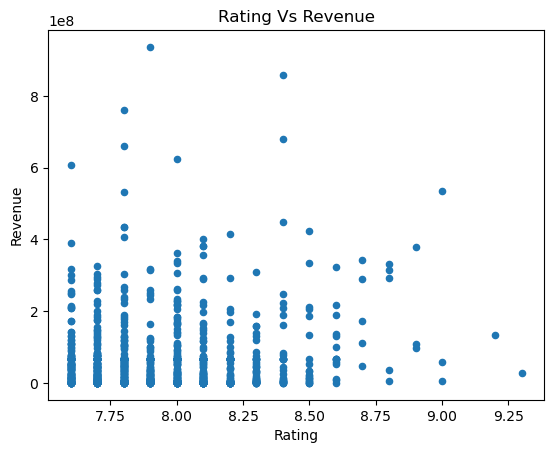

In [39]:
movies.plot.scatter(x='Rating', y='Revenue')
plt.title("Rating Vs Revenue")
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.show()

There is a little correlation between Rating and Revenue

<Axes: xlabel='Rating', ylabel='count'>

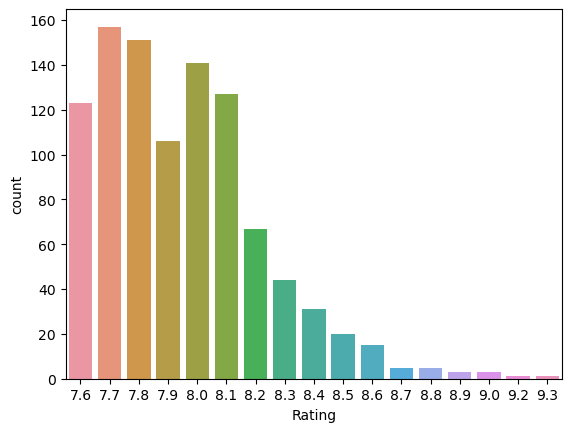

In [40]:
sns.countplot(x="Rating",data=movies) 

 7.7 is the rating given to most no. of movies

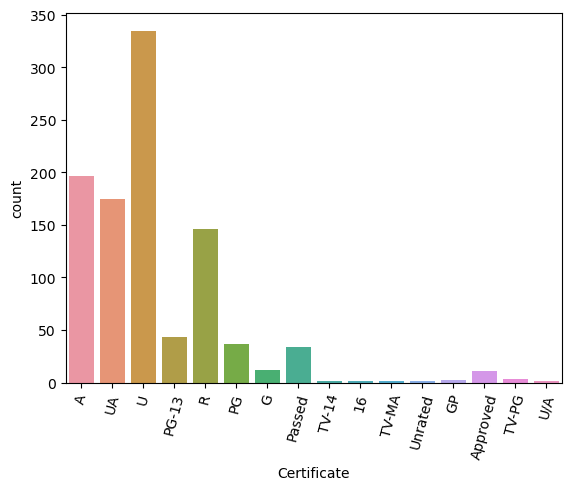

In [41]:
sns.countplot(x="Certificate",data=movies) 
plt.xticks(rotation=75)
plt.show()

 Most movies are 'U' certified ie.suitable for all ages

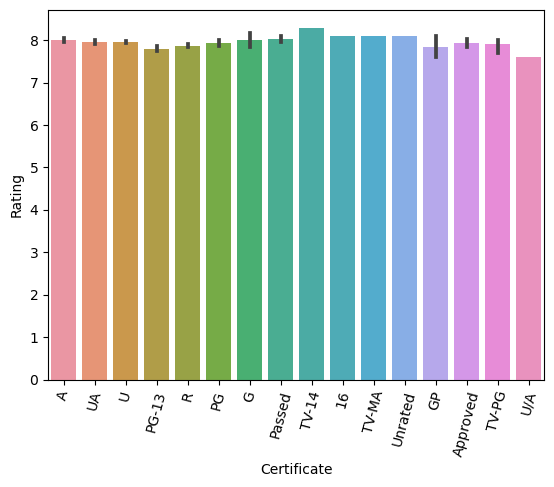

In [42]:
sns.barplot(x="Certificate",y="Rating",data=movies)
plt.xticks(rotation=75)
plt.show()

TV-14 certificate has the highest rating.The ratings for all certificaions is almost similar

In [43]:
top_rates = movies.groupby('Genre').mean().sort_values('Rating',ascending=False).head(10)
top_rates = top_rates[['Rating']].round(2)
top_rates.reset_index(inplace=True)
top_rates                            

,Genre,Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
5,"Crime, Drama, Music",8.30
6,"Mystery, Romance, Thriller",8.30
7,"Adventure, Mystery, Thriller",8.30
8,"Drama, Fantasy, Horror",8.30
9,"Comedy, Musical, Romance",8.30


Top 10 Genre according to the Rating

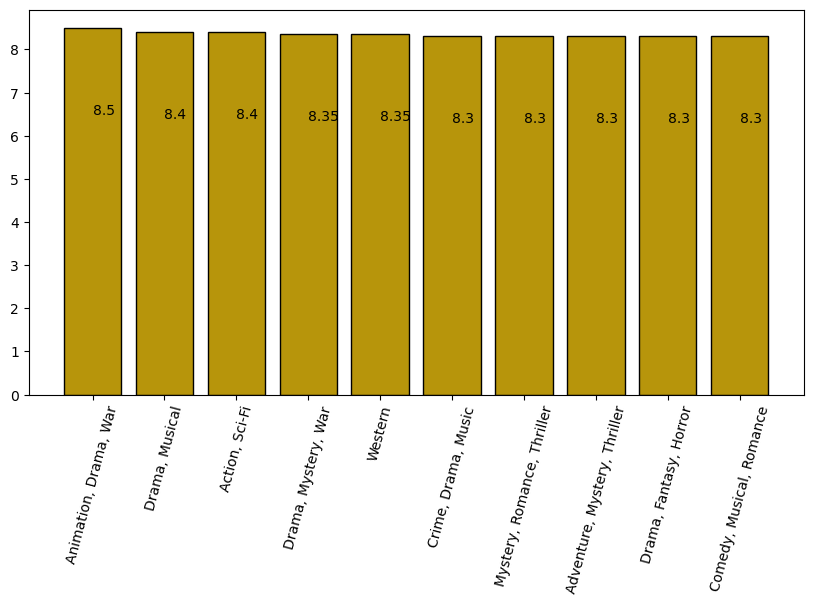

In [44]:
plt.figure(figsize=(10,5))
plt.bar(top_rates['Genre'],top_rates['Rating'], color='#B7950B',edgecolor='black')
plt.xticks(rotation=75)
for k,v in top_rates['Rating'].items():
    plt.text(k,v-2,str(v), rotation=0)

Movies with 'Animation,Drama,War' genre recieved most rating

In [45]:
top_rates=movies.groupby('Genre').mean().sort_values('Metascore',ascending=False).head(10)
top_rates = top_rates[['Metascore']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,Genre,Metascore
0,"Mystery, Romance, Thriller",100.0
1,"Comedy, Musical, Romance",99.0
2,"Drama, Fantasy, War",98.0
3,"Adventure, Mystery, Thriller",98.0
4,"Comedy, Music, Romance",98.0
5,"Action, Adventure, Romance",97.0
6,"Film-Noir, Mystery, Thriller",97.0
7,"Film-Noir, Mystery",96.0
8,"Film-Noir, Thriller",94.0
9,"Animation, Drama, War",94.0


Top 10 Genre according to the Metascore

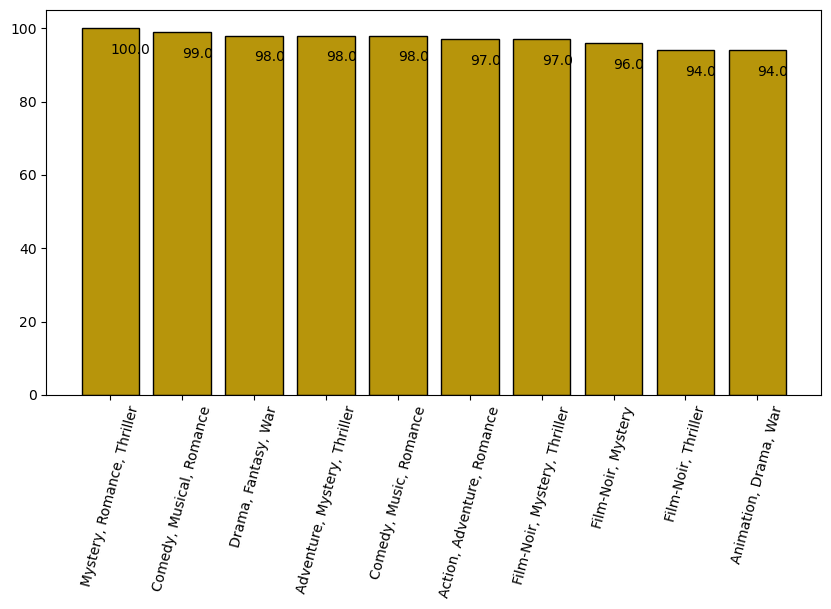

In [46]:
plt.figure(figsize=(10,5))
plt.bar(top_rates['Genre'],top_rates['Metascore'],color='#B7950B',edgecolor='black' )
plt.xticks(rotation=75)
for k,v in top_rates['Metascore'].items():
    plt.text(k,v-7,str(v), rotation=0)  

Movies whose genre 'Mystery, Romance, Thriller' achieved higher meta score

In [47]:
top_director=movies.groupby('Director').mean().sort_values('Revenue').head(10)
top_director=top_director[['Rating']]
top_director.reset_index(inplace=True)
top_director

,Director,Rating
0,Anders Thomas Jensen,7.8
1,Thomas Jahn,8.0
2,Jaco Van Dormael,7.8
3,Jeong-beom Lee,7.8
4,Vikramaditya Motwane,8.2
5,Mikael Håfström,7.8
6,Carl Theodor Dreyer,8.1
7,Troy Duffy,7.8
8,Jean-Pierre Melville,8.1
9,Tigmanshu Dhulia,8.2


Top 10 Directors according to the Rating

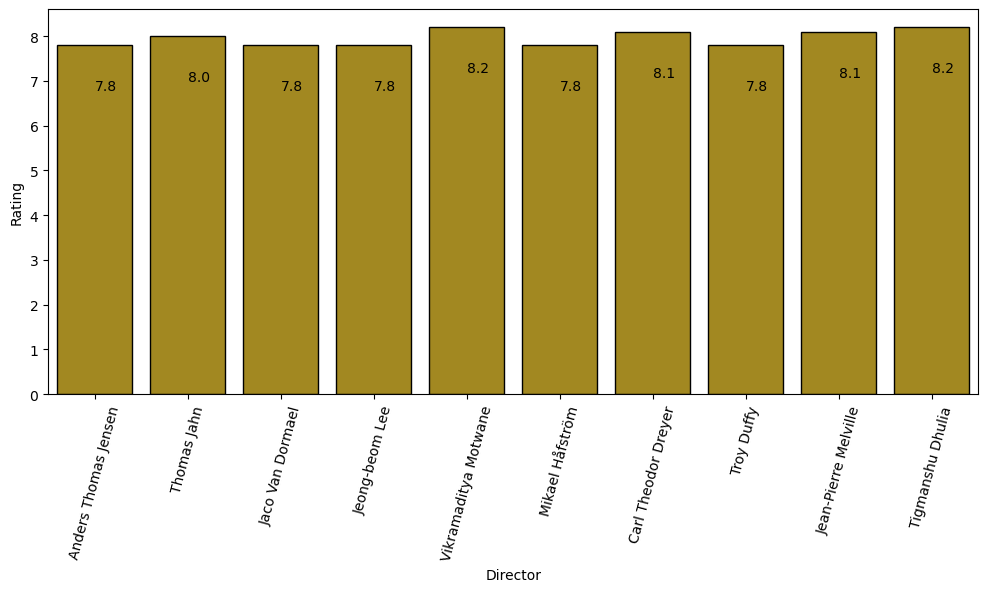

In [48]:
plt.figure(figsize=(12,5))
sns.barplot(x='Director',y='Rating',data=top_director,color='#B7950B',edgecolor='black')
plt.xticks(rotation=75)
for k,v in top_director['Rating'].items():
    plt.text(k,v-1,str(v),rotation=0) 

The director 'Tigmanshu Dhulia','Vikramaditya Motwane' achieved the most high imdb rates

In [49]:
top_earn = movies.groupby('Genre').sum().sort_values('Revenue',ascending=False).head(10)
top_earn=top_earn[['Revenue']]
top_earn.reset_index(inplace=True)
top_earn

,Genre,Revenue
0,"Action, Adventure, Sci-Fi",5.898659e+09
1,"Animation, Adventure, Comedy",4.775477e+09
2,"Action, Adventure, Drama",2.804905e+09
3,Drama,2.701246e+09
4,"Drama, Romance",2.371101e+09
5,"Action, Adventure, Fantasy",2.116341e+09
6,"Animation, Action, Adventure",2.076729e+09
7,"Action, Adventure, Comedy",1.988449e+09
8,"Action, Crime, Drama",1.853320e+09
9,"Biography, Drama, History",1.612822e+09


Top 10 Genres according to the Revenue

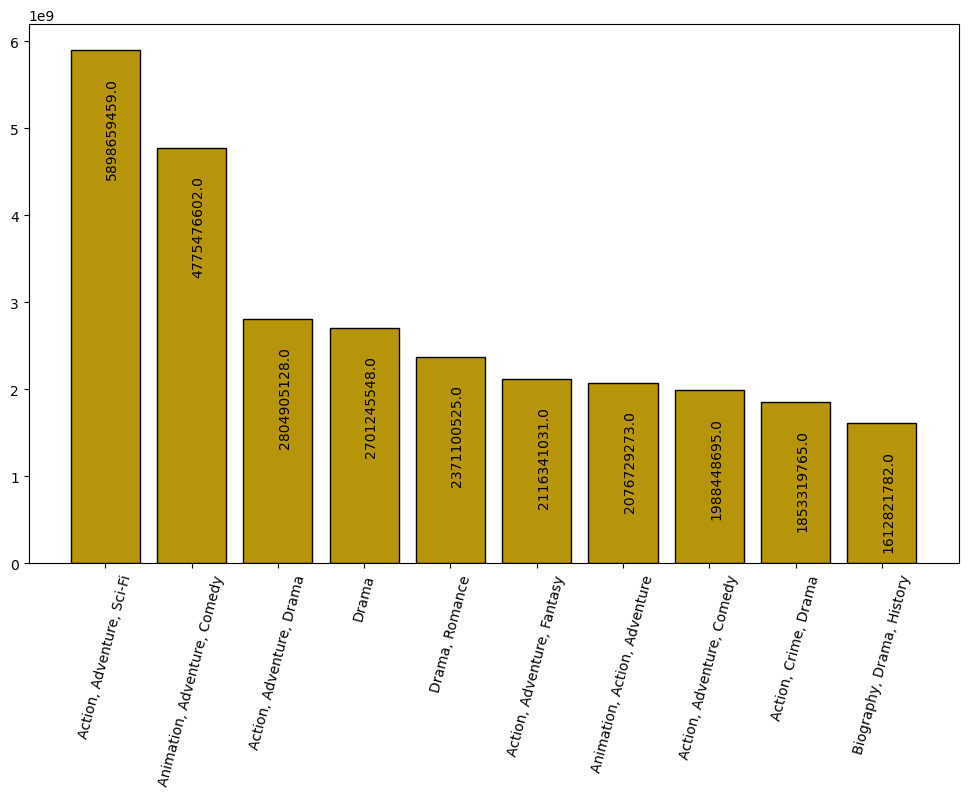

In [50]:
plt.figure(figsize=(12,7))
plt.bar(top_earn['Genre'],top_earn['Revenue'].round(2),color='#B7950B',edgecolor='black')
plt.xticks(rotation=75)
for k,v in top_earn['Revenue'].round(2).items():
     plt.text(k,v-1450000000,str(v),rotation=90)

Movies whose genre 'Action,Adventure ,Sci-Fi' achieve the most earnings

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'UA'),
  Text(2, 0, 'U'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'R'),
  Text(5, 0, 'PG'),
  Text(6, 0, 'G'),
  Text(7, 0, 'Passed'),
  Text(8, 0, 'TV-14'),
  Text(9, 0, '16'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'Unrated'),
  Text(12, 0, 'GP'),
  Text(13, 0, 'Approved'),
  Text(14, 0, 'TV-PG'),
  Text(15, 0, 'U/A')])

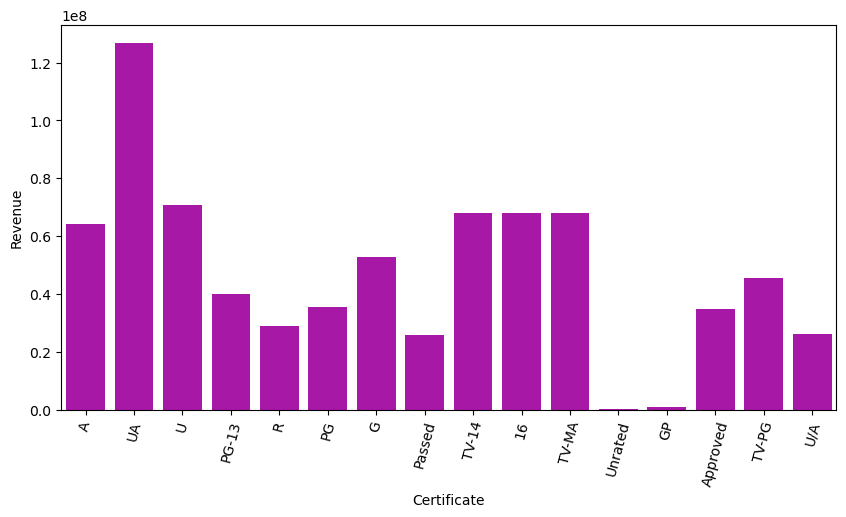

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x='Certificate', y='Revenue', color='m', data=movies, ci=False)
plt.xticks(rotation=75) 

Movies whose certificates 'UA' acheived more earnings

In [52]:
movies = movies.astype({"Runtime": str})
movies['Runtime']=movies['Runtime'].str.replace(' min','') 
movies = movies.astype({"Runtime": int})

movies.dtypes

Title           object
Year            object
Certificate     object
Runtime          int32
Genre           object
Rating         float64
Plot            object
Metascore      float64
Director        object
Cast            object
Votes            int64
Revenue        float64
dtype: object

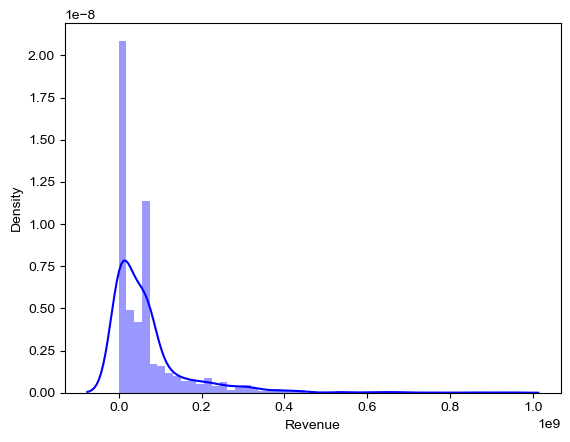

In [53]:
sns.distplot(movies['Revenue'], color='blue')
sns.set(style='dark',)
plt.show()

<Axes: xlabel='Metascore', ylabel='Density'>

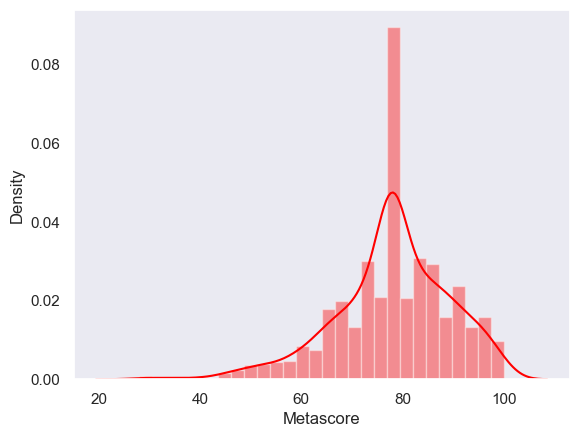

In [54]:
sns.distplot(movies['Metascore'], color='red')  

<Axes: xlabel='Rating', ylabel='Density'>

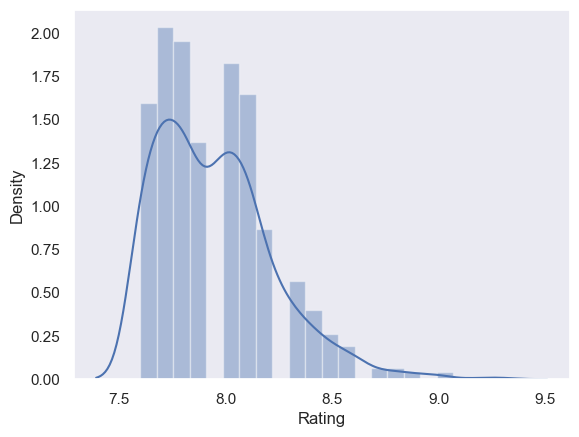

In [55]:
sns.distplot(movies['Rating'])  

# Correlation of the features 

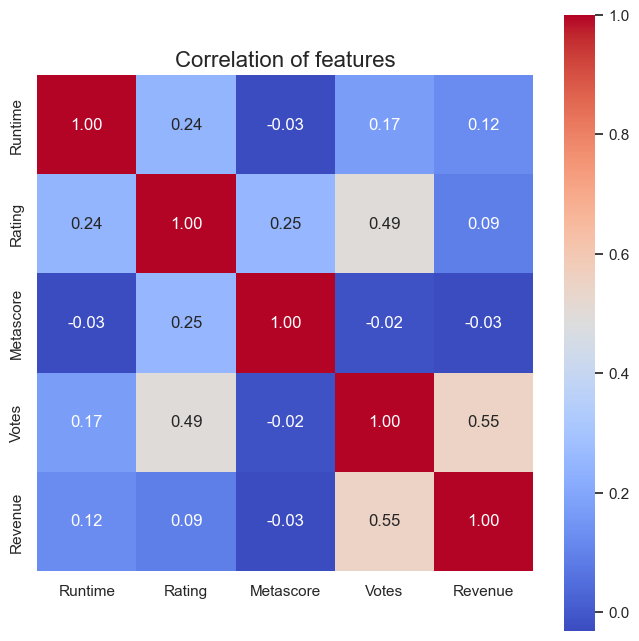

In [56]:
corr = movies.corr()  # Heatmap 

f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, square=True, ax=ax, annot=True, cmap='coolwarm',fmt='.2f', annot_kws={'size':12})
plt.title('Correlation of features', size=16)
plt.show()



<Axes: xlabel='Rating', ylabel='Revenue'>

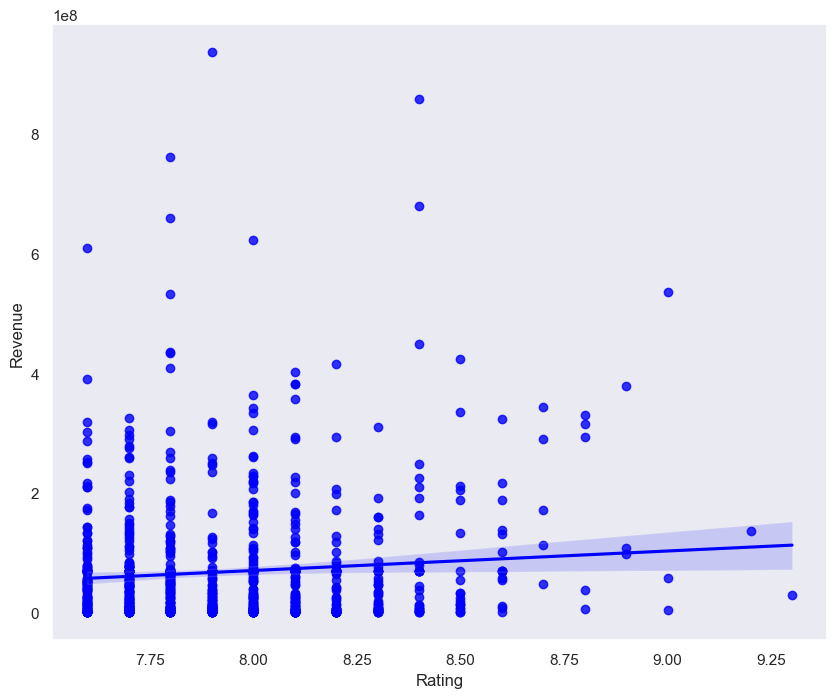

In [57]:
plt.figure(figsize=(10,8))
sns.regplot(x='Rating',y='Revenue',data=movies,color='blue')

There's a week positive relationship between IMDB rating and earnings of the movie

<Axes: xlabel='Metascore', ylabel='Revenue'>

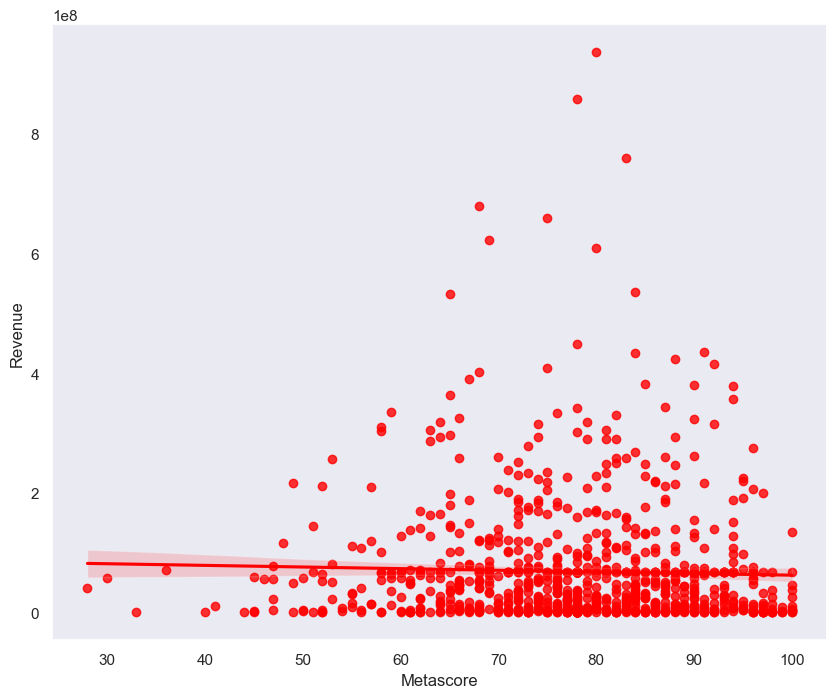

In [58]:
plt.figure(figsize=(10,8))
sns.regplot(x='Metascore',y='Revenue',data=movies,color='red')

Approximately the higher meta score movie gain the higher earnings

<Axes: xlabel='Runtime', ylabel='Rating'>

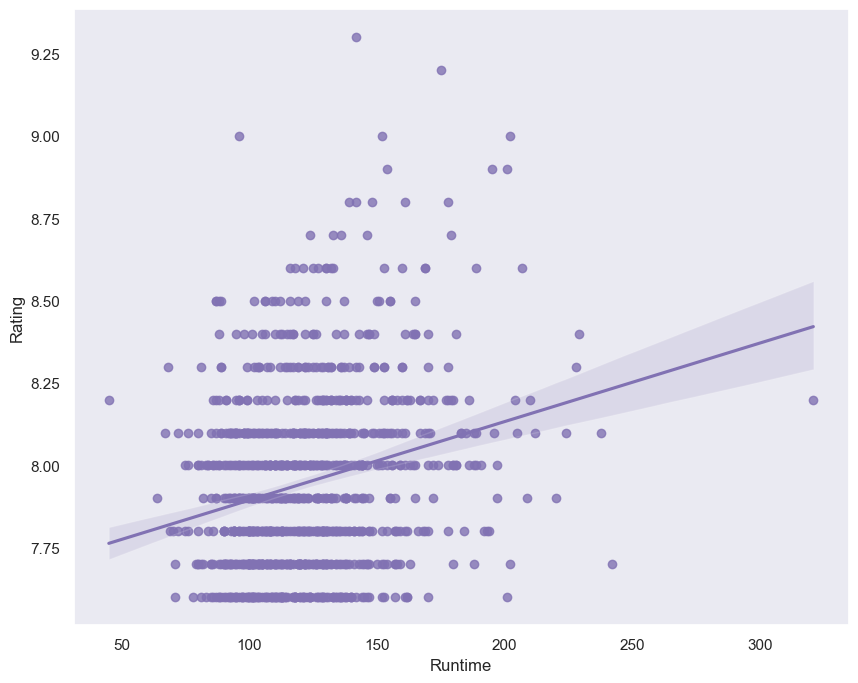

In [59]:
plt.figure(figsize=(10,8))
sns.regplot(x='Runtime', y='Rating',data=movies,color='m')

There is strong relation between Runtime and the rating of movie

<Axes: xlabel='Runtime', ylabel='Metascore'>

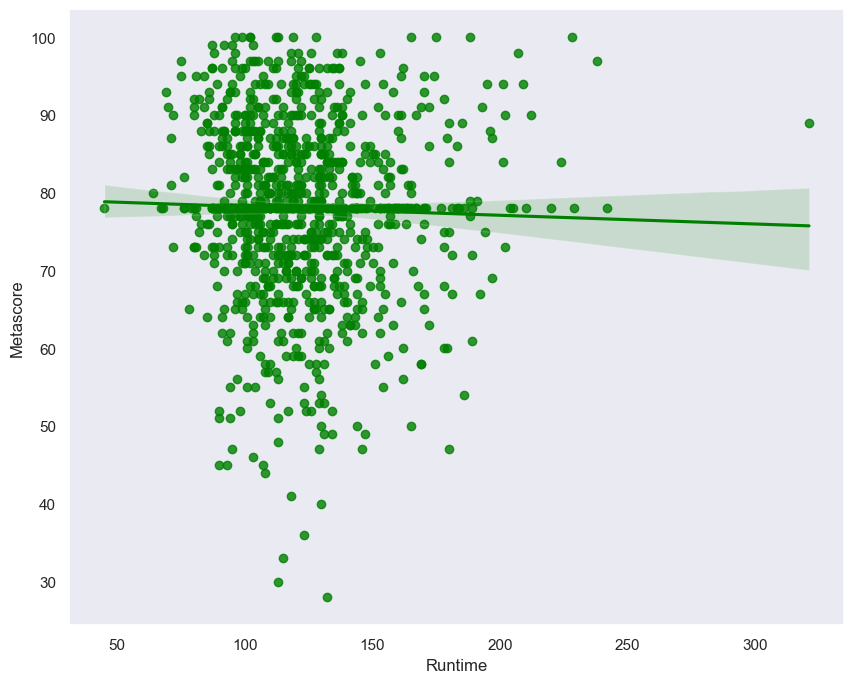

In [60]:
plt.figure(figsize=(10,8))
sns.regplot(x='Runtime', y='Metascore',data=movies,color='green')

Approximately there is no relation between Run time and meta score

In [61]:
movies.dtypes

Title           object
Year            object
Certificate     object
Runtime          int32
Genre           object
Rating         float64
Plot            object
Metascore      float64
Director        object
Cast            object
Votes            int64
Revenue        float64
dtype: object

# Model Training and Evaluation

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
'''
min_df=3: Specifies the minimum number of documents (samples) in which a word must appear to be included in the vocabulary. Words appearing in fewer than three documents will be ignored.

max_features=None: Sets the maximum number of features (words or n-grams) to consider. If None, all features will be used.

strip_accents='unicode': Removes accents and diacritics from the text using Unicode normalization.

analyzer='word': Tokenizes the text into words and treats each word as a separate feature.

token_pattern=r'\w{1,}': Specifies the regular expression pattern for tokenizing. It considers words with at least one alphanumeric character as valid tokens.

ngram_range=(1, 3): Considers n-grams of different lengths (unigrams, bigrams, and trigrams).

stop_words='english': Removes common English stopwords (e.g., "the," "is," "and") from the text during tokenization.
'''

tf = TfidfVectorizer(min_df=3, max_features=None,
                     strip_accents='unicode', analyzer = 'word',token_pattern = r'\w{1,}',
                     ngram_range=(1,3),
                     stop_words='english')

In [64]:
tf

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

In [65]:
tfidf_matrix = tf.fit_transform(movies['Plot'])

In [66]:
tfidf_matrix

<1000x1319 sparse matrix of type '<class 'numpy.float64'>'
	with 9384 stored elements in Compressed Sparse Row format>

In [67]:
tfidf_matrix.shape

(1000, 1319)

In [68]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [69]:
sig = sigmoid_kernel(tfidf_matrix,tfidf_matrix)

In [70]:
sig.shape

(1000, 1000)

In [71]:
sig[0]

array([0.76191238, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76162352, 0.76163481, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76161941, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76164548, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.7616092 , 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76161397, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76168369, 0.76159416,
       0.76159416, 0.76161296, 0.76159416, 0.76159416, 0.76159

In [72]:
indices = pd.Series(movies.index, index = movies['Title']).drop_duplicates()

In [73]:
indices

Title
The Shawshank Redemption      0
The Godfather                 1
The Dark Knight               2
The Godfather: Part II        3
12 Angry Men                  4
                           ... 
Breakfast at Tiffany's      995
Giant                       996
From Here to Eternity       997
Lifeboat                    998
The 39 Steps                999
Length: 1000, dtype: int64

In [74]:
indices['The Godfather']

1

In [75]:
sig[22]

array([0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76191238, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76162697, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76162664, 0.76162882, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76162259, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159

In [76]:
list(enumerate(sig[indices['The Godfather']]))

[(0, 0.7615941559557649),
 (1, 0.7619123757486838),
 (2, 0.7615941559557649),
 (3, 0.7616384798333169),
 (4, 0.7615941559557649),
 (5, 0.7616033907084186),
 (6, 0.7615941559557649),
 (7, 0.7615941559557649),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7616031359899595),
 (14, 0.7615941559557649),
 (15, 0.7616188685745963),
 (16, 0.7616231013847504),
 (17, 0.7615941559557649),
 (18, 0.7616004777169118),
 (19, 0.7615941559557649),
 (20, 0.7616023609177064),
 (21, 0.7616059549043159),
 (22, 0.7615941559557649),
 (23, 0.7616014363242055),
 (24, 0.7616011675933752),
 (25, 0.7615941559557649),
 (26, 0.761645567201205),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7616295351494833),
 (30, 0.7616106147729722),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7616137152290536),
 (34, 0.7616052651557919),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.7615

In [77]:
sorted(list(enumerate(sig[indices['The Godfather']])), key=lambda x : x[1], reverse=True)

[(1, 0.7619123757486838),
 (974, 0.7616771221064765),
 (739, 0.7616709319146845),
 (255, 0.7616504008486863),
 (913, 0.7616495633708186),
 (442, 0.7616482392204328),
 (83, 0.7616461480330409),
 (628, 0.7616459000468754),
 (26, 0.761645567201205),
 (184, 0.7616451546616637),
 (307, 0.7616445644578035),
 (543, 0.76164454544347),
 (569, 0.7616425771186635),
 (689, 0.7616421862158176),
 (841, 0.7616410650387759),
 (346, 0.7616403455803761),
 (618, 0.7616386774152634),
 (3, 0.7616384798333169),
 (190, 0.7616378053387843),
 (650, 0.7616375577893255),
 (172, 0.7616372418138183),
 (428, 0.76163639822319),
 (186, 0.7616354852485471),
 (88, 0.7616346905382758),
 (209, 0.7616328032032631),
 (299, 0.7616327871021218),
 (573, 0.7616315546449303),
 (77, 0.7616300288217823),
 (165, 0.7616296409567469),
 (29, 0.7616295351494833),
 (664, 0.7616277665588913),
 (377, 0.7616276963868238),
 (87, 0.7616268427535008),
 (196, 0.7616268420421237),
 (360, 0.7616268171615695),
 (474, 0.7616266966117771),
 (607, 

# Recomendation based on Plot similarity

In [78]:
def give_recommendation(title, sig=sig):
    #Get the indices corresponding to original title

    idx = indices[title]
    
    #Get the pairwaise similarity score
    sig_scores = list(enumerate(sig[idx]))
    
    #Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x : x[1], reverse=True)
    

    #Score of the 10 most similar movies
    sig_scores = sig_scores[1:11]
    
    #Get the movie indices
    movie_indices = [i[0] for i in sig_scores]
    
    #Top 10 Most Similar Movies
    return movies['Title'].iloc[movie_indices]

In [79]:
#Running Trained Model to Get Recommendations

give_recommendation('The Godfather')

974                The Godfather: Part III
739                               Nebraska
255                                  Fargo
913                              Die Welle
442                The Night of the Hunter
83                      The Great Dictator
628    The Curious Case of Benjamin Button
26                         La vita è bella
184                        Smultronstället
307                        Ace in the Hole
Name: Title, dtype: object

# Recommendation based on Genre 

In [80]:
df['Genre'] = df['Genre'].str.strip().str.replace(',',' ')
df['Genre']

0                         Drama
1                  Crime  Drama
2          Action  Crime  Drama
3                  Crime  Drama
4                  Crime  Drama
                 ...           
995      Comedy  Drama  Romance
996              Drama  Western
997         Drama  Romance  War
998                  Drama  War
999    Crime  Mystery  Thriller
Name: Genre, Length: 1000, dtype: object

In [81]:
tfidf_matrix = tf.fit_transform(df['Genre'])
tfidf_matrix.shape

(1000, 172)

In [82]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.32753693, 0.17065823, 0.32753693],
       [0.32753693, 1.        , 0.52103507, 1.        ],
       [0.17065823, 0.52103507, 1.        , 0.52103507],
       [0.32753693, 1.        , 0.52103507, 1.        ]])

In [83]:
# Build a 1-dimensional array with movie titles
titles = movies['Title']
indices = pd.Series(df.index, index=movies['Title'])

In [84]:
# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [85]:
genre_recommendations('Soorarai Pottru')

9                           Fight Club
17     One Flew Over the Cuckoo's Nest
20                     Soorarai Pottru
40                  American History X
53                          Capharnaüm
88                              Jagten
89             Jodaeiye Nader az Simin
91                Miracle in cell NO.7
97                 Requiem for a Dream
98                     American Beauty
121                              Ikiru
122                Ladri di biciclette
141                              Udaan
149                There Will Be Blood
154                              Black
156             Swades: We, the People
188                   Tôkyô monogatari
190                      All About Eve
200                              Mommy
206                         Kis Uykusu
Name: Title, dtype: object

# Recommendation based on Director

In [86]:
tfidf_matrix = tf.fit_transform(df['Director'])
tfidf_matrix.shape

(1000, 342)

In [87]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [88]:
movies['Title'] = movies['Title'].astype(str)
titles = movies['Title']
indices = pd.Series(df.index, index=movies['Title'])

In [89]:
def director_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [90]:
director_recommendations('Inception')

8                                              Inception
21                                          Interstellar
36                                          The Prestige
63                                 The Dark Knight Rises
69                                               Memento
155                                        Batman Begins
573                                              Dunkirk
725                        Mission: Impossible - Fallout
744                                       The Lego Movie
0                               The Shawshank Redemption
1                                          The Godfather
3                                 The Godfather: Part II
4                                           12 Angry Men
5          The Lord of the Rings: The Return of the King
6                                           Pulp Fiction
7                                       Schindler's List
9                                             Fight Club
10     The Lord of the Rings: T

# Recommendation based on Title similarity

In [91]:
movies['Title'] = movies['Title'].astype(str)

In [92]:
tfidf_matrix = tf.fit_transform(movies['Title'])
tfidf_matrix.shape

(1000, 104)

In [93]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [94]:
titles = movies['Title']
indices = pd.Series(df.index, index=movies['Title'])

In [95]:
def title_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [96]:
title_recommendations('12 Angry Men')

215                                     12 Years a Slave
232                               No Country for Old Men
513                                      Children of Men
536                              All the President's Men
336                                        Short Term 12
824                                       A Few Good Men
479                           X-Men: Days of Future Past
0                               The Shawshank Redemption
1                                          The Godfather
2                                        The Dark Knight
3                                 The Godfather: Part II
5          The Lord of the Rings: The Return of the King
6                                           Pulp Fiction
7                                       Schindler's List
8                                              Inception
9                                             Fight Club
10     The Lord of the Rings: The Fellowship of the Ring
11                             

# Recommendation based on Rating

In [97]:
movies['Rating'] = movies['Rating'].astype(str)

In [98]:
tfidf_matrix = tf.fit_transform(movies['Rating'])
tfidf_matrix.shape

(1000, 25)

In [99]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [100]:
titles = movies['Title']
indices = pd.Series(df.index, index=movies['Title'])

In [101]:
def rating_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [109]:
rating_recommendations('The Shawshank Redemption')

1                                         The Godfather
2                                       The Dark Knight
3                                The Godfather: Part II
4                                          12 Angry Men
5         The Lord of the Rings: The Return of the King
6                                          Pulp Fiction
7                                      Schindler's List
8                                             Inception
9                                            Fight Club
10    The Lord of the Rings: The Fellowship of the Ring
11                                         Forrest Gump
12                      Il buono, il brutto, il cattivo
13                The Lord of the Rings: The Two Towers
14                                           The Matrix
15                                           Goodfellas
16       Star Wars: Episode V - The Empire Strikes Back
17                      One Flew Over the Cuckoo's Nest
18                                             H

# Recommendation based on Certificate

In [103]:
movies['Certificate'] = movies['Certificate'].astype(str)

In [104]:
tfidf_matrix = tf.fit_transform(movies['Certificate'])
tfidf_matrix.shape

(1000, 11)

In [105]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [106]:
def certificate_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [107]:
certificate_recommendations('The Lion King')

5         The Lord of the Rings: The Return of the King
10    The Lord of the Rings: The Fellowship of the Ring
20                                      Soorarai Pottru
23                        Sen to Chihiro no kamikakushi
26                                      La vita è bella
30                                              Seppuku
31                                 Shichinin no samurai
36                                         The Prestige
43                                        The Lion King
44                           Terminator 2: Judgment Day
45                                Nuovo Cinema Paradiso
46                                       Hotaru no haka
47                                   Back to the Future
48                         Once Upon a Time in the West
50                                           Casablanca
54                            Ayla: The Daughter of War
56                                       Kimi no na wa.
57                                              

# Analysis and Conclusion

The model generates the recommended movies based on the Title input provided with Plot being the parameter of the function.
Parameters like Genre, Director also generated the movies suggestions.

There's a week positive relationship between IMDB rating and earnings of the movie.
Most movies are 'U' certified suitable for all ages.
TV-14 certificate has the highest rating.
Movies with 'Animation,Drama,War' genre received most rating.
Movies whose genre 'Mystery, Romance, Thriller' achieved higher meta score.
Movies whose genre 'Action, Adventure, Sci-Fi' achieve the most earnings.
Movies whose certificates 'UA' achieved more earnings.There is strong relation between Runtime and the rating of movie.
Approximately the higher meta score movie gain the higher earnings.




# Future Scope

The further additional improvement can be achieved by developing a versatile and robust  model like : 
recommending movies based on filters like Cast, Rating, Certificates, Released Year, Revenue, Runtime

Selecting a dataset which includes a variety of Features, greater amount of inputs to cater a wide circle of audience.

Finally implementing some front-end deployment of the model with some web application and pleasing UI/UX visuals.

